In [98]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np

In [2]:
tf.__version__


'2.1.0'

In [3]:
keras.__version__

'2.2.4-tf'

In [12]:
fashion_mnist = keras.datasets.mnist


In [14]:
fashion_mnist

<module 'tensorflow_core.python.keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\prashant\\Anaconda3\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [13]:
(X_train_full, y_train_full) ,( x_test , y_test) = fashion_mnist.load_data()

11493376/11490434 [==============================] - 16s 1us/step


In [17]:
X_train_full.shape

(60000, 28, 28)

In [20]:
X_train_full.dtype

dtype('uint8')

In [26]:
x_test.shape

(10000, 28, 28)

In [33]:
x_valid , x_train = X_train_full[:5000]/255 , X_train_full[5000 : ]/255
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]

In [34]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [35]:
class_names[y_train[0]]

'Sneaker'

In [44]:
y_train_full.shape

(60000,)

In [46]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.layers

In [52]:
weight , bias = model.layers[1].get_weights()

In [54]:
weight.shape

(784, 300)

In [55]:
bias.shape

(300,)

In [56]:
model.compile(loss='sparse_categorical_crossentropy',optimizer = 'sgd' , metrics =['accuracy'])

In [70]:
history = model.fit(x_train , y_train , epochs = 30 , validation_data=(x_valid , y_valid) )

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 19s 343us/sample - loss: 0.0448 - accuracy: 0.9887 - val_loss: 0.0719 - val_accuracy: 0.9784
Epoch 2/30
55000/55000 [==============================] - 20s 356us/sample - loss: 0.0422 - accuracy: 0.9893 - val_loss: 0.0719 - val_accuracy: 0.9788
Epoch 3/30
55000/55000 [==============================] - 20s 362us/sample - loss: 0.0398 - accuracy: 0.9903 - val_loss: 0.0703 - val_accuracy: 0.9800
Epoch 4/30
55000/55000 [==============================] - 20s 356us/sample - loss: 0.0375 - accuracy: 0.9907 - val_loss: 0.0699 - val_accuracy: 0.9796
Epoch 5/30
55000/55000 [==============================] - 27s 493us/sample - loss: 0.0356 - accuracy: 0.9912 - val_loss: 0.0691 - val_accuracy: 0.9800
Epoch 6/30
55000/55000 [==============================] - 24s 435us/sample - loss: 0.0334 - accuracy: 0.9918 - val_loss: 0.0674 - val_accuracy: 0.9804
Epoch 7/30
55000/55000 [=====================

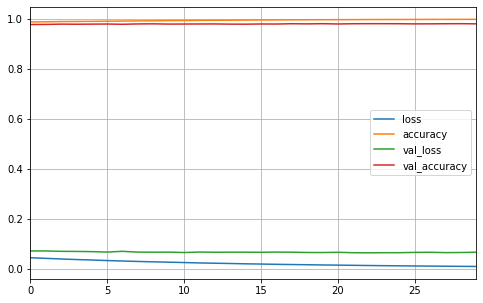

In [87]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [72]:
model.evaluate(x_test ,y_test)

10000/10000 [==============================] - 2s 235us/sample - loss: 15.1925 - accuracy: 0.9755


[15.192497122454643, 0.9755]

In [78]:
print(X_train_full.shape)
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(60000, 28, 28)
(55000, 28, 28)
(5000, 28, 28)
(10000, 28, 28)


In [95]:
x_predict = x_test[:3]
y_predict = model.predict(x_predict)
y_predict,round(2)

(array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 2)

In [96]:
y_predict = model.predict_classes(x_predict)
y_predict

array([7, 2, 1], dtype=int64)

In [99]:
np.array(class_names)[y_predict]

array(['Sneaker', 'Pullover', 'Trouser'], dtype='<U11')

In [100]:
np.array(class_names)[y_test[:3]]

array(['Sneaker', 'Pullover', 'Trouser'], dtype='<U11')

In [101]:
model.save('my_keras_classification_model.h5')

In [ ]:
# TO load model
# model = keras.model.load_model(my_keall)